# Spotify EDA Project 

In this notebook I played around with a spotify dataset I downloaded from kaggle. The dataset gathers songs from 2017 using the Spotify API, and classifies each one via several attributes like danceability, acousticness, duration, energy, etc. I do an exploratory data analysis on the dataset and answer some questions that intrigued me while playing around with the data.

In [57]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
sns.set_style("darkgrid")

### Load Dataset

In [59]:
df = pd.read_csv('data.csv')

# In the original dataset, the author gave each song a label of '1' or '0', corresponding to the songs they liked or didn't
# like. I don't particularly care about this information so I will get rid of that column.

df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


## Data Cleaning

In [60]:
# checking for any missing values
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [61]:
# Checking information of Columns (datatypes and such)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [62]:
# number of rows and columns
df.shape

(2017, 16)

In [63]:
a = df.columns
print(a)
print(len(df.columns))

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')
16


## Analysis

In [64]:
# Statistical summary
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### What are the top 10 artists in this dataset?
Basically I wanna rank these artists by popularity, and to do this I will just take into account the number of songs they have in the dataset. Probably not the best way to measure popularity, but assuming this is someone's say, personal playlist, I think that it is good enough.

In [65]:
top_10_artists = df.groupby("artist").count().sort_values(by = "song_title", ascending = False)["song_title"][:10]
top_10_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
FIDLAR              9
Crystal Castles     9
*NSYNC              8
Fall Out Boy        8
Michael Jackson     8
Name: song_title, dtype: int64

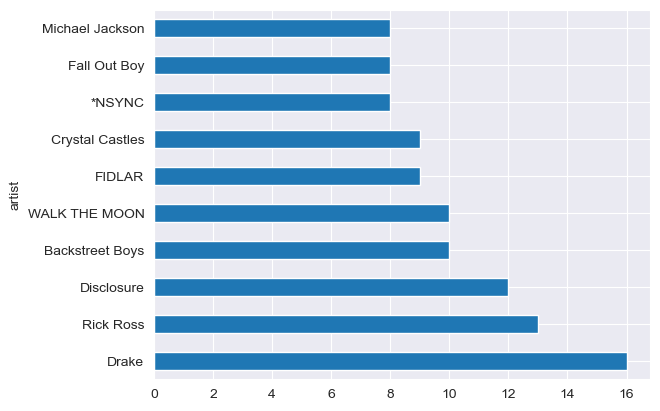

In [66]:
#Visualize
top_10_artists.plot.barh()
plt.show()

### What are the 10 loudest Tracks?

In [67]:
top_10_loudest_tracks = df[["loudness", "song_title"]].sort_values(by = "loudness", ascending = False)[:10]
top_10_loudest_tracks

,loudness,song_title
195,-0.307,GodLovesUgly
636,-0.718,The Lion - Original Mix
1443,-0.787,The Wall
2010,-0.935,Hey Baby - Steve Aoki Remix
1299,-0.994,No Absolution
205,-1.157,Double Bubble Trouble
629,-1.188,Pop That
1467,-1.258,Help
591,-1.367,Higher - Extended
1307,-1.374,Fauxhammer


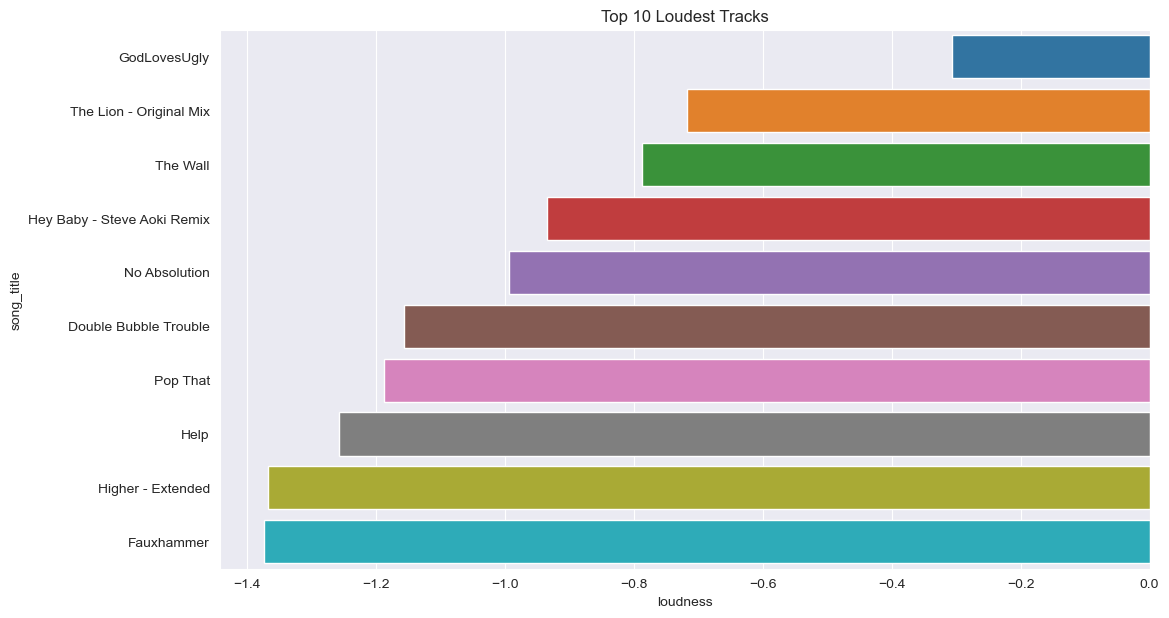

In [68]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "loudness", y = "song_title", data = top_10_loudest_tracks )
plt.title("Top 10 Loudest Tracks")
plt.show()

### Who are the artists with the most danceable songs?

In [69]:
top_10_artist_dance = df[["danceability", "song_title","artist"]].sort_values(by = "danceability", ascending = False)[:10]
top_10_artist_dance


,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice
1136,0.950,Bad Liar,Selena Gomez
1977,0.947,Fuck Kd,StaRR Lyfe
138,0.944,Sippin On Some Syrup,Three 6 Mafia
623,0.941,I'm Different,2 Chainz
1591,0.941,Little Green Apple,Tumble Tots


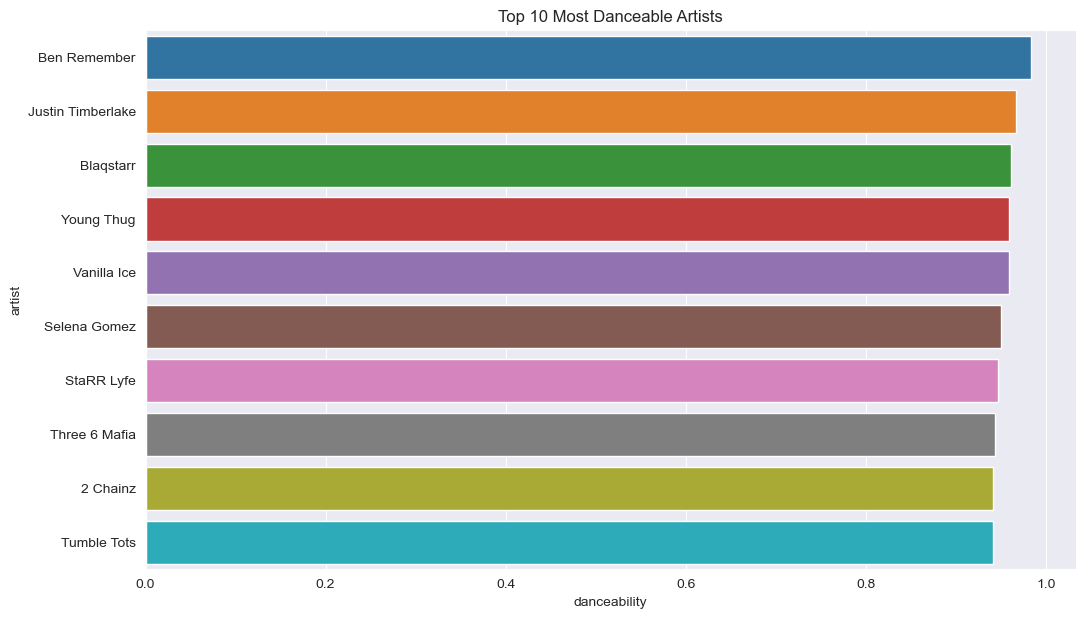

In [70]:
# Visualization
plt.figure(figsize = (12, 7))
sns.barplot(x = "danceability", y = "artist", data = top_10_artist_dance )
plt.title("Top 10 Most Danceable Artists")
plt.show()

### Top 10 most instrumental songs?

In [71]:
top_instrumental = df[["instrumentalness","song_title","artist"]].sort_values(by = "instrumentalness", ascending = False)[:10]
top_instrumental

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


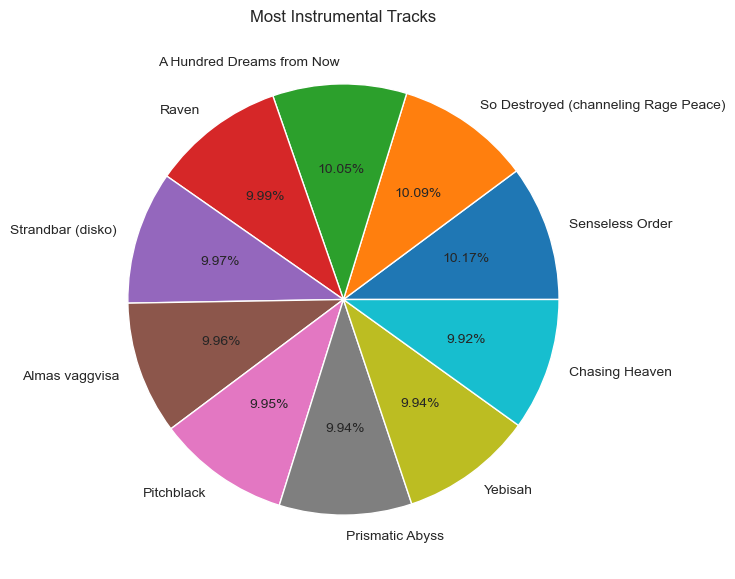

In [72]:
# Visualization
plt.figure(figsize = (12, 7))
plt.pie(x = "instrumentalness", data = top_instrumental, autopct = '%1.2f%%', labels = top_instrumental.song_title )
plt.title("Most Instrumental Tracks")
plt.show()


### Historgrams for several other features

In [73]:
interest_features_cols = ["tempo", "loudness", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness", "liveness", "speechiness", "valence"]

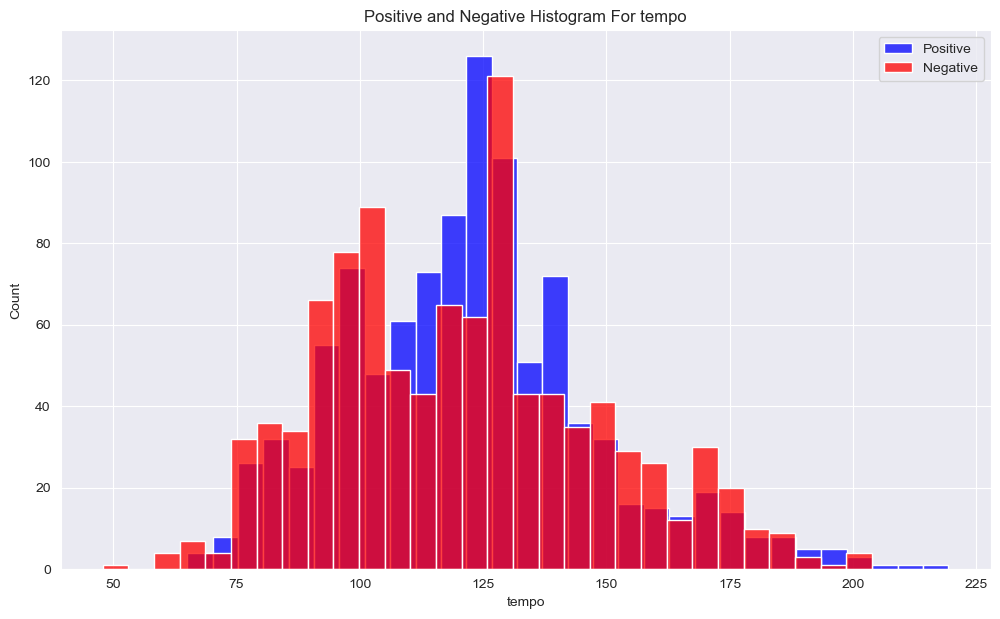

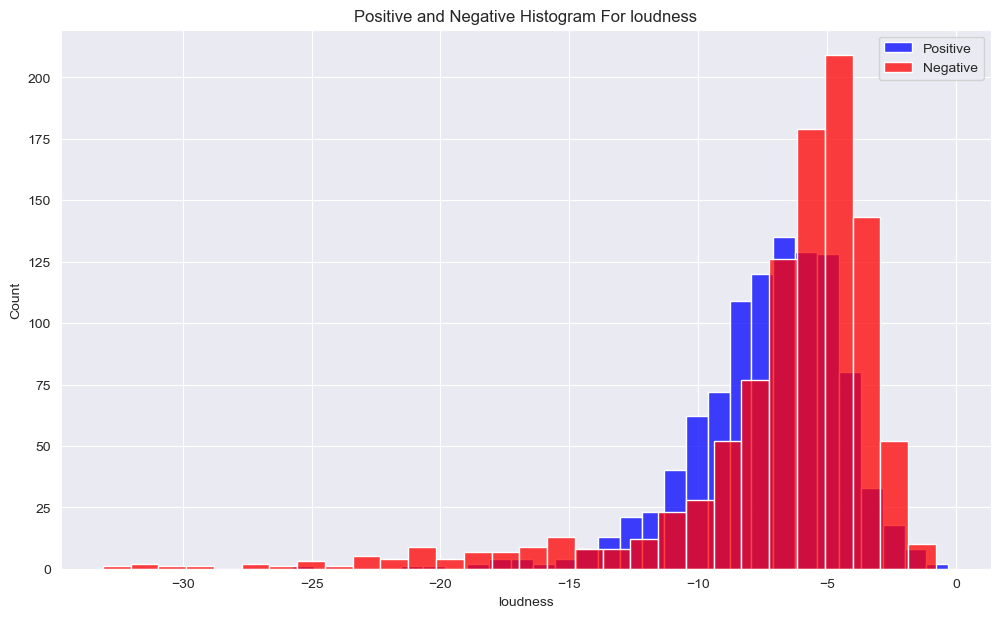

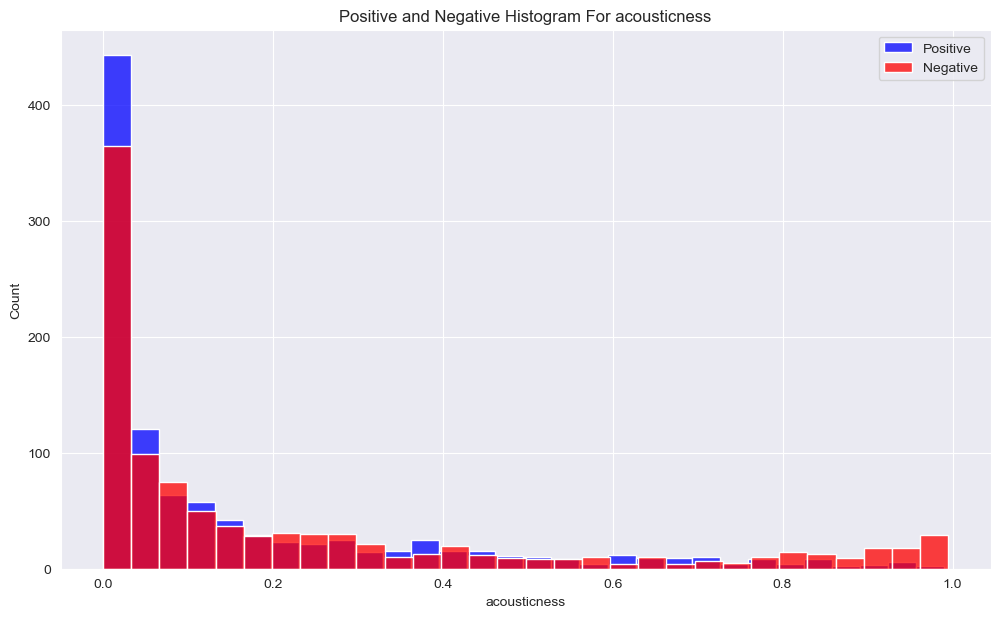

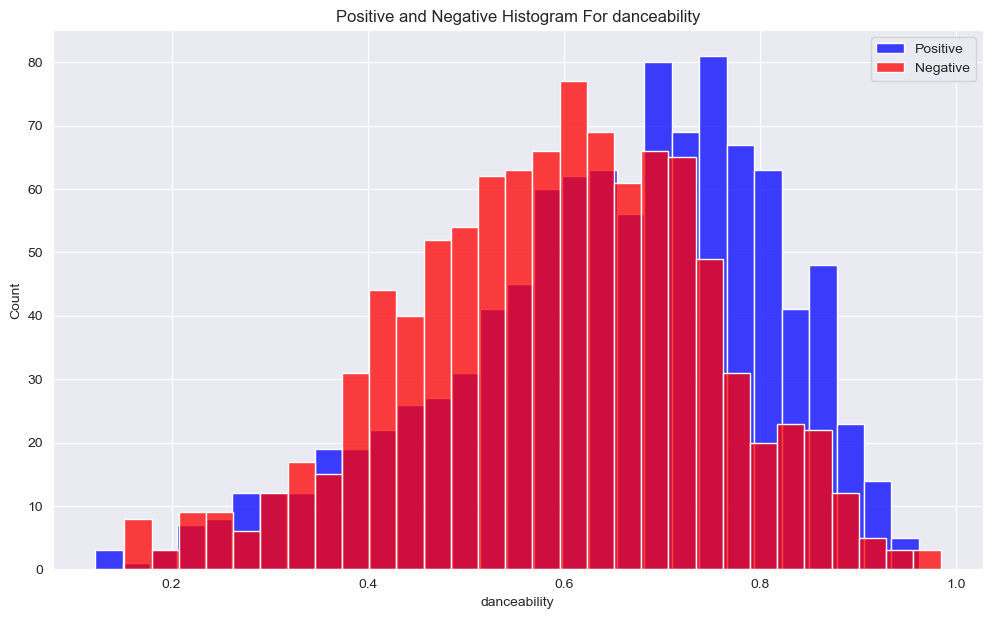

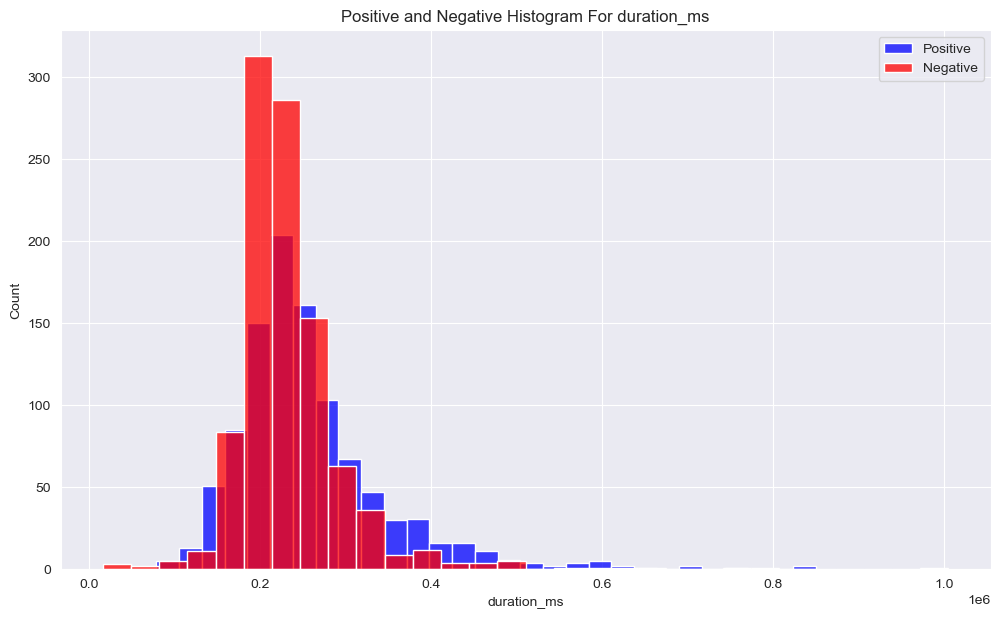

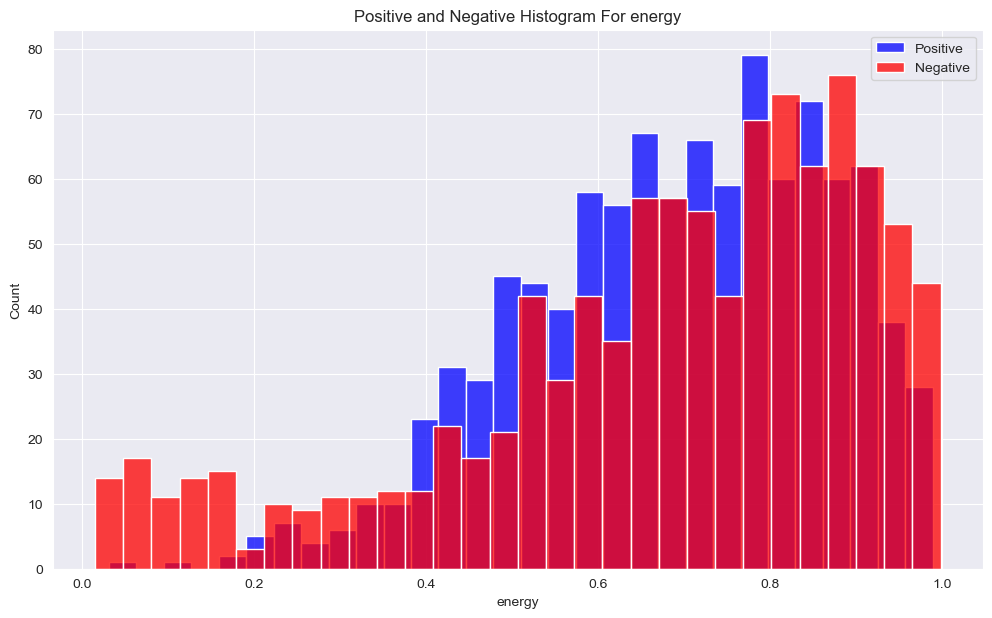

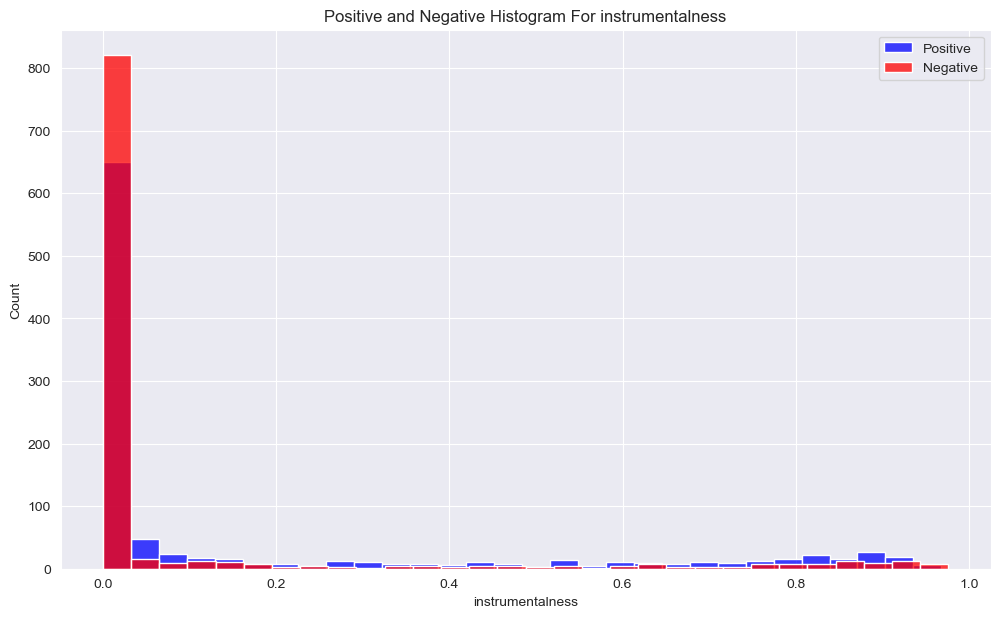

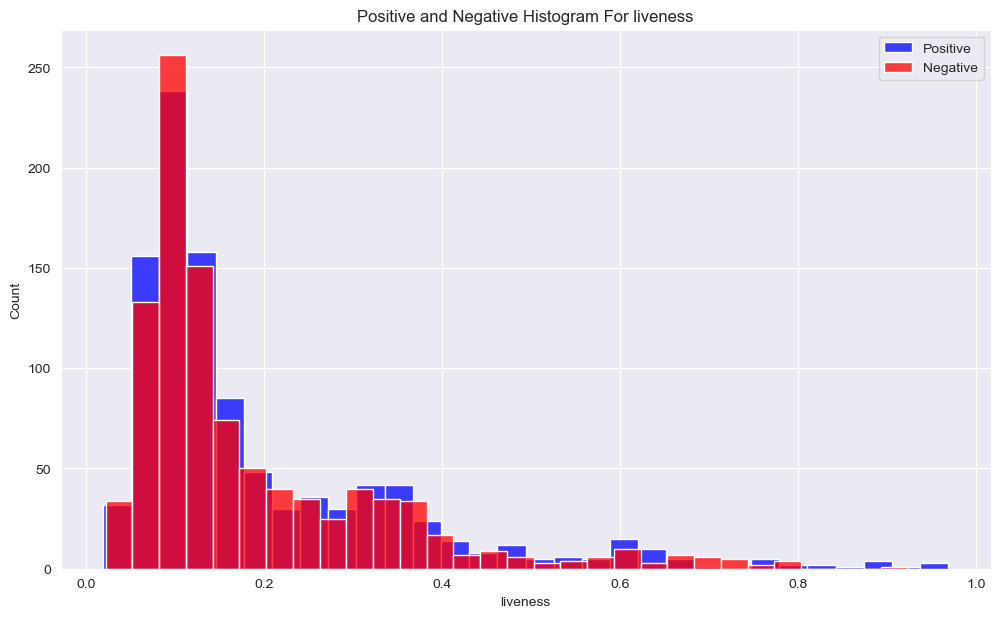

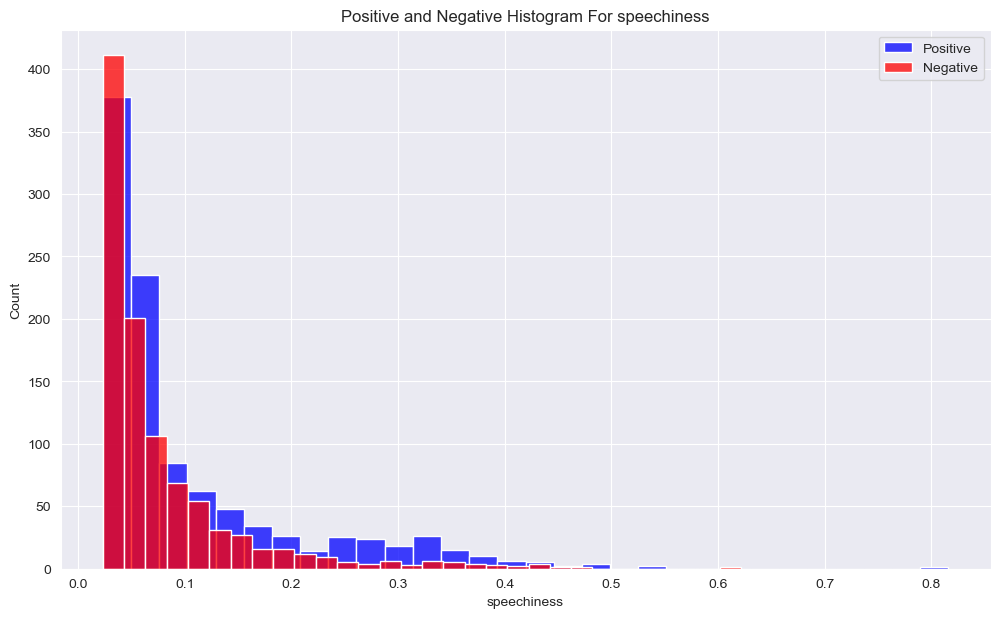

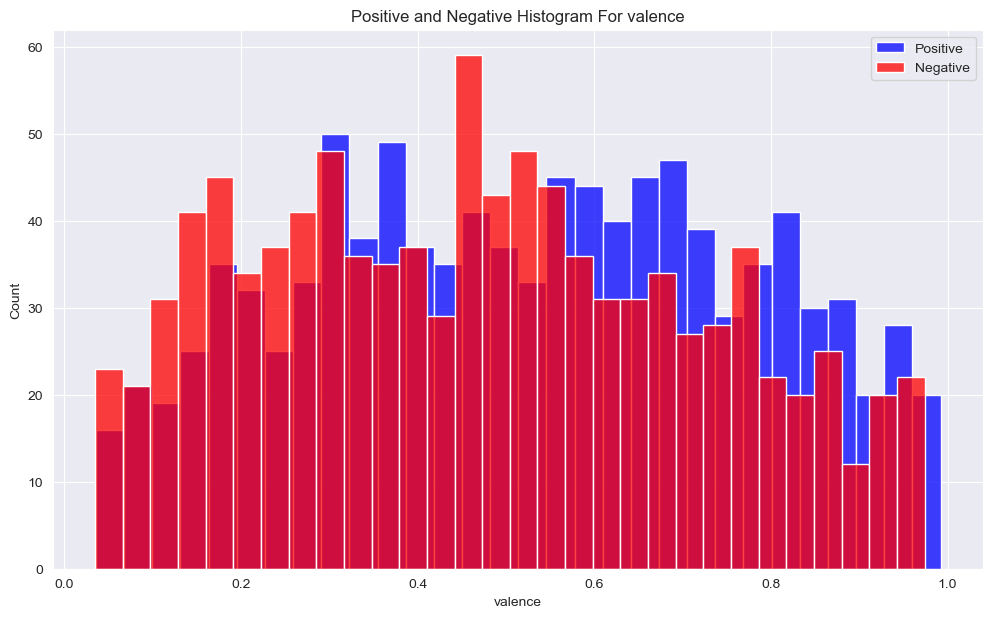

In [74]:
for feature in interest_features_cols:
    pos_data = df[df["target"] == 1][feature]
    neg_data = df[df["target"] == 0][feature]
    
    plt.figure(figsize = (12, 7))
    sns.histplot(pos_data, bins = 30, label = "Positive", color = "blue")
    sns.histplot(neg_data, bins = 30, label = "Negative", color = "Red")
    
    plt.legend(loc = "upper right")
    plt.title(f"Positive and Negative Histogram For {feature}")
    plt.show

### Top 10 most energetic tracks

In [75]:
top_10_energy = df[["energy", "song_title"]].sort_values(by = "energy", ascending = False)[:10]
top_10_energy

,energy,song_title
1299,0.998,No Absolution
1322,0.997,Pitchblack
1297,0.994,A Darkened Gospel
1347,0.993,Unanswered
2015,0.992,First Contact
1680,0.992,Paranoia
1332,0.992,Beautiful Agony
1328,0.991,Down into the Abyss
1681,0.990,Hated
1296,0.990,Black Colors


### Top 10 tracks with the most valence

In [76]:
top_10_valence = df[['valence','song_title']].sort_values(by = 'valence', ascending = False)[:10]
top_10_valence

,valence,song_title
460,0.992,Abataka - Original Mix
912,0.975,I'm Walkin' - 2002 Digital Remaster
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)"
207,0.973,Look at You
48,0.973,Azon de ma gnin kpevi
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...
1590,0.972,Jelly On A Plate
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...
497,0.968,Mi Swing es Tropical
112,0.967,Please Mr. Postman


### Most common track durations

In [77]:
#1st convert duration column from millisecond to seconds, then to minutes
df['duration_ms'] = df['duration_ms']/60000
df.rename(columns = {'duration_ms':'duration_m'}, inplace = True)
df.head(10)

,acousticness,danceability,duration_m,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,3.410000,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,5.448883,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,3.095117,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,3.323550,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,6.548217,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,4.188883,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,0.01450,0.739,4.023333,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,0.02020,0.266,5.827783,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,0.04810,0.603,3.380883,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,0.00208,0.836,3.780667,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


Instead of dealing with exact track durations I convert these float to integers so we'll be able to count them. 

In [78]:
#Sorting values
track_len = df[['song_title','duration_m']].sort_values('duration_m', ascending = False)
track_len


,song_title,duration_m
1535,The Nearness of You,16.743783
695,Music Is the Answer - Original Extended 12-Inc...,14.166000
819,Southern Man - Live,13.750450
1603,Viola Sonata in C Minor: III. Andante con vari...,13.066883
1565,Gloomy Sunday,12.724450
...,...,...
936,Aloha,0.866767
1583,Peas Pudding Hot,0.859117
1591,Little Green Apple,0.792450
1436,dance alot,0.276467


The longest track is 16.7 minutes long and the shortest is 0.267 minutes. This means that we need ranges up until 16-17min.

In [79]:
track_len = track_len.astype({'duration_m':'int'})
track_len

,song_title,duration_m
1535,The Nearness of You,16
695,Music Is the Answer - Original Extended 12-Inc...,14
819,Southern Man - Live,13
1603,Viola Sonata in C Minor: III. Andante con vari...,13
1565,Gloomy Sunday,12
...,...,...
936,Aloha,0
1583,Peas Pudding Hot,0
1591,Little Green Apple,0
1436,dance alot,0


It is important to note that the tracks that have '0' as a length, just means they are under a minute long, and for every other track, they are in the range of that integer, so 16 is between 16 and 17 minutes; but 16 for short.

In [80]:
most_pop_track_len = track_len.groupby('duration_m').count().reset_index()
most_pop_track_len.rename(columns = {'song_title':'Number of Songs'}, inplace=True)

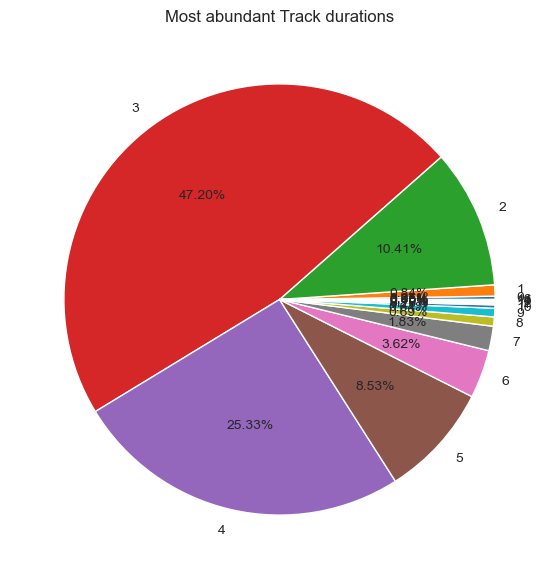

In [81]:
plt.figure(figsize = (12, 7))
plt.pie(x = "Number of Songs", data = most_pop_track_len, autopct = '%1.2f%%', labels = most_pop_track_len.duration_m )
plt.title("Most abundant Track durations")
plt.show()

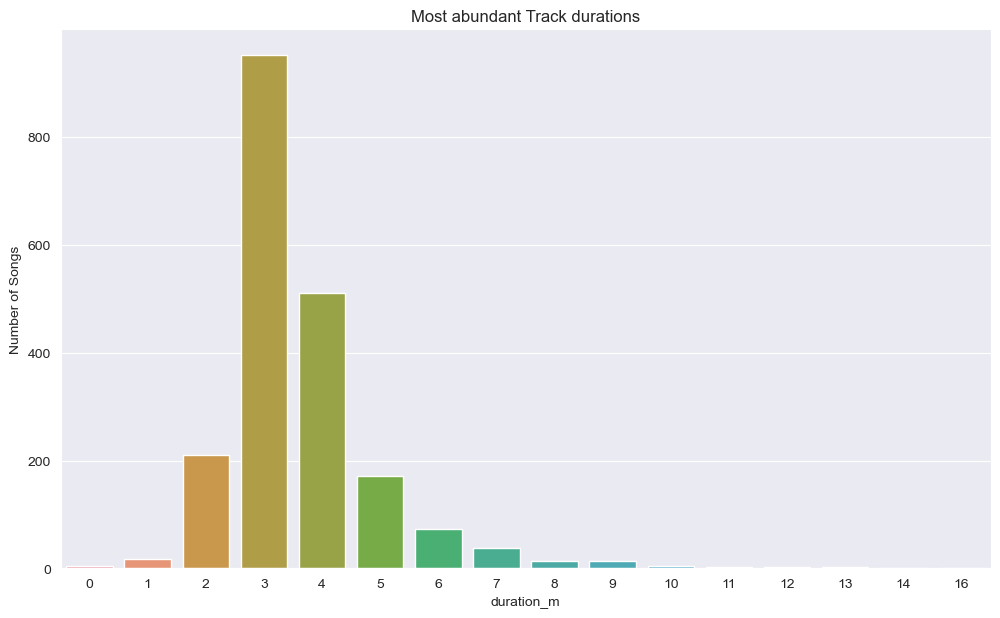

In [82]:

plt.figure(figsize = (12, 7))
sns.barplot(x = "duration_m", y = "Number of Songs", data = most_pop_track_len )
plt.title("Most abundant Track durations")
plt.show()

### Exploring my own Spotify Playlist
Playing around with this dataset I got curious if I could explore my own Spotify playlists. So I decided to use the Spotify API to retrieve my 'Liked Songs' playlist into a dataframe, and explore the data a little bit

#### Spotify API 

In [84]:
import sys
!{sys.executable} -m pip install cpython
!{sys.executable} -m pip install spotipy --upgrade

  Using cached cPython-0.0.6.tar.gz (4.7 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 382.0/382.0 kB 528.8 kB/s eta 0:00:00
  Using cached dnspython-2.2.1-py3-none-any.whl (269 kB)
  Created wheel for cpython: filename=cPython-0.0.6-py3-none-any.whl size=4911 sha256=38d4267a963d14b9f078b66591e86d1171553e033fa172f39a7a62bba27b8e66
  Stored in directory: c:\users\josea\appdata\local\pip\cache\wheels\f2\20\47\d2492204cd01ccc75838b1d2ce9a3cda0148a43e7e03737a4e
Successfully built cpython
  Using cached redis-4.3.4-py3-none-any.whl (246 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)


In [85]:
# Using Spotipy to work with the Spotify API
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
cid ="15d20c2817f445529cd2c6f69af14fd3" 
secret = "2d68b48f551740de83d6e67c73a05685" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [87]:
# retrieving my playlist
playlist_code = input("Enter the Playlist Link: \n")
playlist_dict = sp.playlist(playlist_code)

no_of_songs = playlist_dict["tracks"]["total"]

album_list = []
song_list = []
release_date_list = []
artists_list = []

tracks = playlist_dict["tracks"]
items = tracks["items"]
offset=0
i=0
while i<no_of_songs:
    song = items[i-offset]["track"]["name"]
    album = items[i-offset]["track"]["album"]["name"]
    release_date = items[i-offset]["track"]["album"]["release_date"]
    artists = [k["name"] for k in items[i-offset]["track"]["artists"]]
    artists = ','.join(artists)
    album_list.append(album)
    song_list.append(song)
    release_date_list.append(release_date)
    artists_list.append(artists)
    if (i+1)%100 == 0:
        tracks = sp.next(tracks)
        items = tracks["items"]
        offset = i+1
    i+=1
    
final_data = list(zip(song_list,artists_list,album_list,release_date_list))

Enter the Playlist Link: 
https://open.spotify.com/playlist/0ubZQurFpfjHA82u7VCCS3?si=43ddda2291c64a67


In [88]:
# Trurning data into a dataframe
liked_playlist = pd.DataFrame(final_data)
liked_playlist.head(20)

,0,1,2,3
0,Mariners Apartment Complex,Lana Del Rey,Norman Fucking Rockwell!,2019-08-30
1,Norman fucking Rockwell,Lana Del Rey,Norman Fucking Rockwell!,2019-08-30
2,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12
3,Diet Mountain Dew,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12
4,Summertime Sadness,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12
5,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12
6,Patrol Acrobatique,"The Fearless Flyers,Vulf",The Fearless Flyers III,2022-03-04
7,Hallucinogenics (feat. Lana Del Rey),"Matt Maeson,Lana Del Rey",Hallucinogenics (feat. Lana Del Rey),2020-09-25
8,RIP,"Apashe,Vladimir Cauchemar",RIP,2022-04-29
9,360º,BFRND,360º,2022-03-11


In [91]:
# Renaming Columns
liked_playlist = liked_playlist.rename(columns = {0:'track_name', 1:'artist',2:'album',3:'date_released'})
liked_playlist.head()

,track_name,artist,album,date_released
0,Mariners Apartment Complex,Lana Del Rey,Norman Fucking Rockwell!,2019-08-30
1,Norman fucking Rockwell,Lana Del Rey,Norman Fucking Rockwell!,2019-08-30
2,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12
3,Diet Mountain Dew,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12
4,Summertime Sadness,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12


### Who are my favorite artists?
Who are the artists who have the most songs in my 'liked songs' playlist

In [92]:
fav_artist = liked_playlist.groupby('artist').count().sort_values(by = "track_name", ascending = False)["track_name"][:10]
fav_artist.head()

artist
Kanye West       50
Playboi Carti    32
Bad Bunny        25
Frank Ocean      23
Travis Scott     22
Name: track_name, dtype: int64

### What are my favorite years in music?
The most common release years in my playlist.

In [93]:
# What is the datatype of 'date_released' column?
liked_playlist.dtypes

track_name       object
artist           object
album            object
date_released    object
dtype: object

In [94]:
# Converting 'date_released' to date-time data type
liked_playlist["date_released"] = pd.to_datetime(liked_playlist["date_released"])
liked_playlist.dtypes

track_name               object
artist                   object
album                    object
date_released    datetime64[ns]
dtype: object

In [95]:
# Creating a 'year' column
liked_playlist["year"] = liked_playlist["date_released"].dt.year
liked_playlist.head()

,track_name,artist,album,date_released,year
0,Mariners Apartment Complex,Lana Del Rey,Norman Fucking Rockwell!,2019-08-30,2019.0
1,Norman fucking Rockwell,Lana Del Rey,Norman Fucking Rockwell!,2019-08-30,2019.0
2,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12,2012.0
3,Diet Mountain Dew,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12,2012.0
4,Summertime Sadness,Lana Del Rey,Born To Die - The Paradise Edition,2012-11-12,2012.0


In [96]:
# Converting 'year' from float to int
liked_playlist['year'] = liked_playlist['year'].apply(int)
liked_playlist.dtypes

ValueError: cannot convert float NaN to integer

There seems to be some empty values in my playlist dataframe. My guess is some songs that have been deleted from spotify, but still appear on the playlist for some reason.I will just get rid of any null values

In [97]:
# What are the 'null' songs?
null = pd.isnull(liked_playlist["year"])
liked_playlist[null]

,track_name,artist,album,date_released,year
1239,AssMilk Featuring Earl,"Tyler, The Creator",Bastard,NaT,NaN


This seems to be the 'empty' songs. Just to make sure it is in fact deleted from spotify, I will look it up on the app.
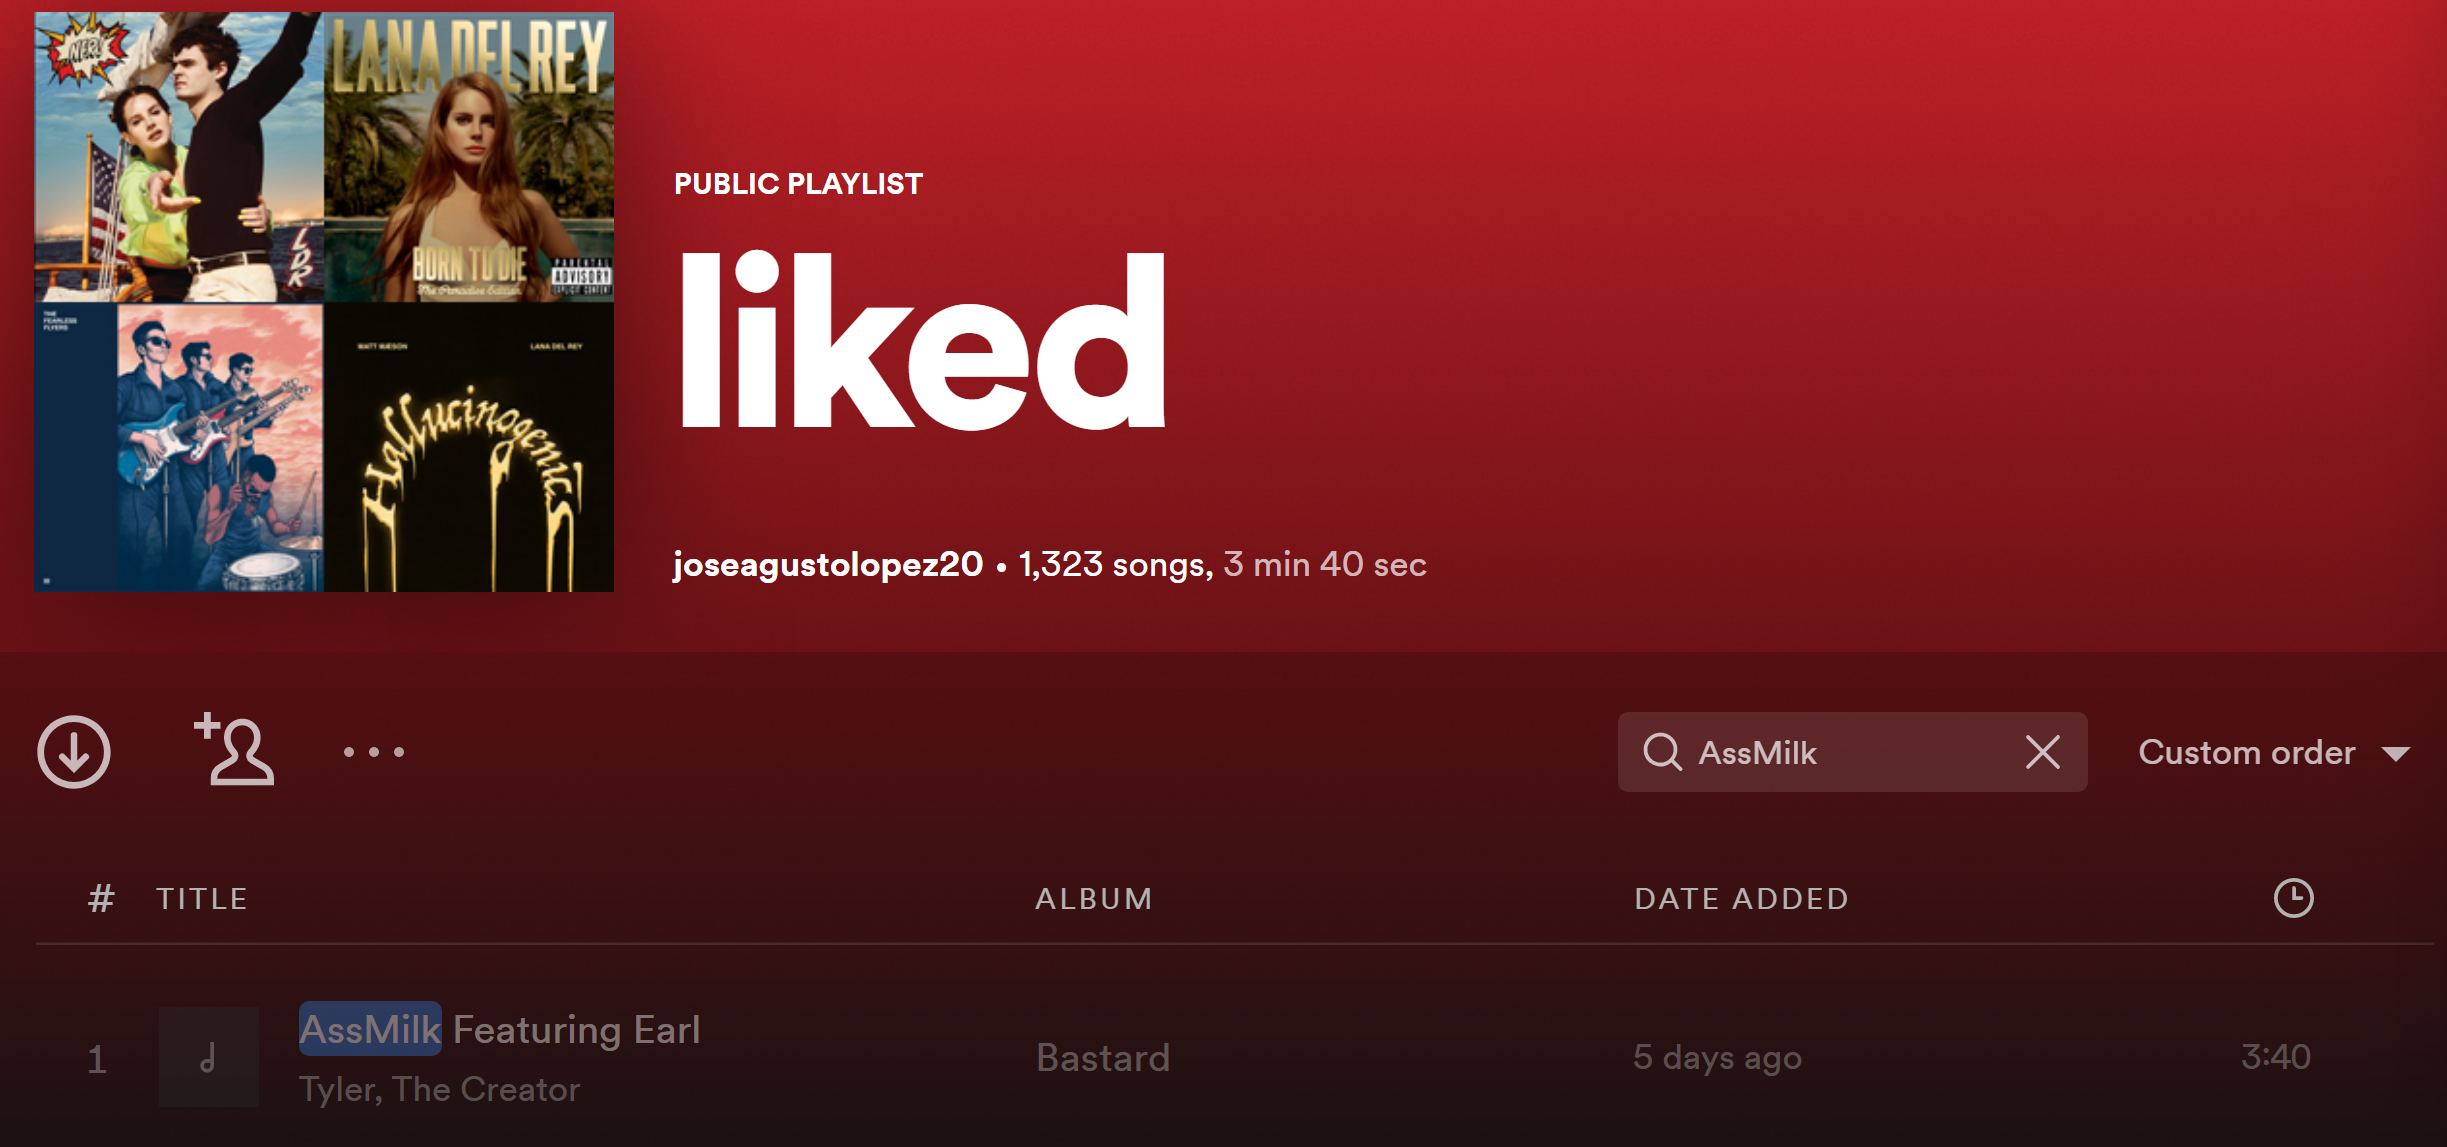
Yup! Deleted from Spotify.

In [98]:
# Deleting 'null' song
liked_playlist = liked_playlist.dropna()
null = pd.isnull(liked_playlist["year"])
liked_playlist[null]

,track_name,artist,album,date_released,year


In [99]:
# Now, finally converting 'year' to int
liked_playlist['year'] = liked_playlist['year'].apply(int)
liked_playlist.dtypes

track_name               object
artist                   object
album                    object
date_released    datetime64[ns]
year                      int64
dtype: object

In [100]:
#Favorite Year
fav_year = liked_playlist.groupby("year").count().sort_values(by = 'track_name', ascending = False)['track_name'][:10]
fav_year

C:\Users\josea\AppData\Local\Temp\ipykernel_11184\2790188983.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  fav_year = liked_playlist.groupby("year").count().sort_values(by = 'track_name', ascending = False)['track_name'][:10]


year
2020    221
2019    154
2018    151
2017    110
2021     99
2015     74
2022     73
2016     57
2012     38
2013     36
Name: track_name, dtype: int64